<a href="https://colab.research.google.com/github/serzaraisk/Statistics/blob/main/Statistics_cheat_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
! pip install bootstrap_stat

import numpy as np
import pandas as pd
import scipy as sc
import requests
import base64
from statsmodels.stats.weightstats import DescrStatsW 
from bootstrap_stat import bootstrap_stat as bp
from statsmodels.sandbox.stats.multicomp import multipletests 
%pylab inline

     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


## UDF

In [13]:
def get_txt_from_github(url):
  req = requests.get(url)
  return req.text.decode()

def t_confidence_intervals(data, alpha=0.05, alternative='two-sided'):
    return DescrStatsW(data).tconfint_mean(alpha=alpha, alternative=alternative)

def t_confidence_intervals_only_scipy(data, aplha=0.05):
    mean = data.mean()
    std = data.std(ddof=1)
    n = len(data)
    alpha = 0.05
    CI = (mean - sc.stats.t.ppf(1 - alpha / 2.0, n-1) * std / np.sqrt(n),
          mean + sc.stats.t.ppf(1 - alpha / 2.0, n-1) * std / np.sqrt(n))
    return CI

def get_bootstrap_samples(x, n_resamples):
    np.random.seed(0)
    indices = np.random.randint(0, len(x), (n_resamples, len(x)))
    resamples = x[indices]
    return resamples

def percentile_interval(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def bca_bootstrap_interval(df, func, bootstrap_num=5000):
    ed = bp.EmpiricalDistribution(df)
    return bp.bcanon_interval(ed, func, df, B=bootstrap_num)

def bca_bootstrap_interval_for_two_samples(df1, df2, func, bootstrap_num=5000):
    joint_dist = bp.MultiSampleEmpiricalDistribution((ilec_time, clec_time))
    return bp.bcanon_interval(joint_dist, func, (df1, df2), B=bootstrap_num)

def adjust_p_value_holms(p_values, alpha=0.5):
    """
    adjust array of p_values based on holms step down method
    p_values: array of p-values(Series)
    """
    _, expression['p_adjusted_holm'], _, _ = multipletests(p_values, alpha = 0.05, method = 'holm') 
    return expression['p_adjusted_holm']

def adjust_p_value_bonferroni(p_values, alpha=0.5):
    """
    adjust array of p_values based on bonferroni method
    p_values: array of p-values(Series)
    
    """
    _, expression['p_adjusted_holm'], _, _ = multipletests(p_values, alpha = 0.05, method = 'bonferroni') 
    return expression['p_adjusted_holm']

def adjust_p_value_fdr_bh(p_values, alpha=0.5):
    """
    adjust array of p_values based on fdr_bh step up method
    p_values: array of p-values(Series)
    """
    _, expression['p_adjusted_holm'], _, _ = multipletests(p_values, alpha = 0.05, method = 'fdr_bh') 
    return expression['p_adjusted_holm']

# Contents


*   List item

*   List item
*   List item


*   List item



## T confindence Intervals

*Use when you want to estimate population parameter, given that your parameter is distributed normally and you don't know population variance*

UDF:


1.   **t_confidence_intervals**
2.   **t_confidence_intervals_only_scipy** 


**Example**: For a sample of 915 biochemistry graduate students we now hom many papers they produced during the last 3 years of their PhD prodram. 

How do we estimate the average number of papers with uncertainty?

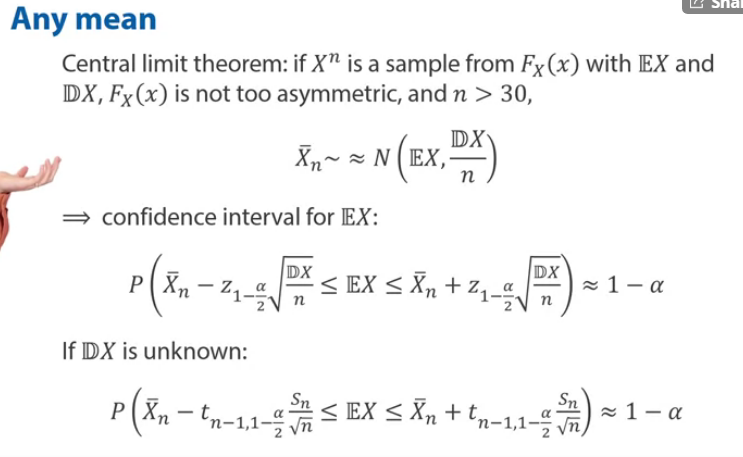

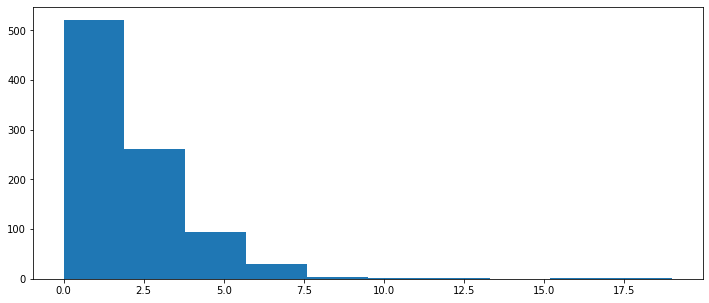

In [ ]:
from numpy import loadtxt
bio_papers = loadtxt('https://raw.githubusercontent.com/serzaraisk/Statistics/main/bioChemists.txt')
plt.hist(bio_papers);

### Estimating the mean
Simple point estimate of the mean:

In [ ]:
bio_papers.mean()

1.692896174863388

Asymptotic confidence interval:

In [ ]:
print("95% confidence interval:", t_confidence_intervals(bio_papers))

95% confidence interval: (1.5679321925466905, 1.8178601571800854)


Another way to calculate it:

In [ ]:
from statsmodels.stats.weightstats import _tconfint_generic
n = len(bio_papers)
print("95% confidence interval:", _tconfint_generic(bio_papers.mean(), 
                                                    bio_papers.std(ddof=1) / np.sqrt(n),
                                                    dof = n-1,
                                                    alpha=0.05,
                                                    alternative = 'two-sided'))

95% confidence interval: (1.5679321925466905, 1.8178601571800854)


Yet another way, without any external libraries:

In [ ]:
print("95% confidence interval:", t_confidence_intervals_only_scipy(bio_papers))

95% confidence interval: (1.5679321925466905, 1.8178601571800854)


## BootStrap methods

*Use when want to estimate some parameter of population, without any assumptions about distribution of population*

UDF:


1.   **Percentile bootstrap**
  1.   **get_bootstrap_samples**
  2.   **percentile_interval**
2.   **BCA_bootstrap**
  1.   **bca_bootstrap_interval**
  2.   **bca_bootstrap_interval_for_two_samples**

Verizon was an Incumbent Local Exchange Carrier (ILEC), responsible for maintaining land-line phone service in certain areas. Verizon also sold long-distance service, as did a number of competitors, termed Competitive Local Exchange Carriers (CLEC). When something went wrong, Verizon was responsible for repairs, and was supposed to make repairs as quickly for CLEC long-distance customers as for their own. The New York Public Utilities Commission (PUC) monitored fairness by comparing repair times for Verizon and different CLECs, for different classes of repairs and time periods.

The data is for one combination of CLEC, class of service, and period.

In [ ]:
verizon_data = pd.read_csv('https://raw.githubusercontent.com/serzaraisk/Statistics/main/Input_data/verizon.txt', sep='\t')
verizon_data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [ ]:
ilec_time = verizon_data[verizon_data.Group == 'ILEC'].Time.values
clec_time = verizon_data[verizon_data.Group == 'CLEC'].Time.values

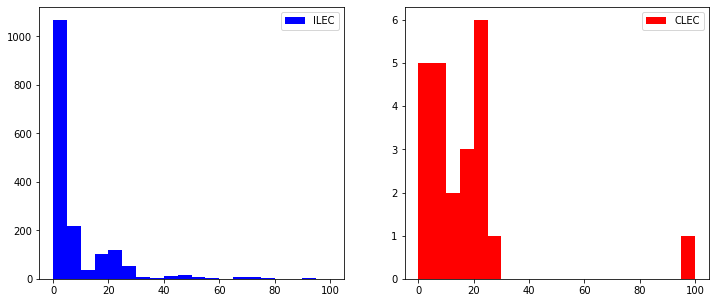

In [ ]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(ilec_time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(clec_time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend();

### For a parameter of a single sample

In [ ]:
np.random.seed(0)

ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 5000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 5000)))

print("95% confidence interval for the ILEC median repair time:",  percentile_interval(ilec_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  percentile_interval(clec_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [3.22  3.825]
95% confidence interval for the CLEC median repair time: [ 5.8  20.28]


### For a combination of parameters of two samples

In [ ]:
print("Estimated difference between repait times:", np.median(clec_time) - np.median(ilec_time))

Estimated difference between repait times: 10.74


In [ ]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores)))
print("95% confidence interval for the difference between median repair times:",  
      percentile_interval(delta_median_scores, 0.05))

95% confidence interval for the difference between median repair times: [ 2.04 16.65]


### BCa bootstrap
An external library https://pypi.org/project/bootstrap-stat/ actually has more exciting bootstrap methods implemented, including BCa bootstrap! The library is rather new and fresh, but seems to be working fine! Here are the examples, you'd have to install the library if you want to run them. 

### For a parameter of a single sample

In [ ]:
print("95% confidence interval for the ILEC median repair time:", 
      bca_bootstrap_interval(ilec_time, np.median))
print("95% confidence interval for the CLEC median repair time:", 
      bca_bootstrap_interval(clec_time, np.median))

95% confidence interval for the ILEC median repair time: (3.28, 3.78)
95% confidence interval for the CLEC median repair time: (5.45, 19.88)


### For a combination of parameters of two samples

In [ ]:
joint_dist = bp.MultiSampleEmpiricalDistribution((ilec_time, clec_time))

def median_diff(two_sample_tuple):
    return np.median(two_sample_tuple[1]) - np.median(two_sample_tuple[0])

print("95% confidence interval for the difference between median repair times:", 
      bp.bcanon_interval(joint_dist, median_diff, (ilec_time, clec_time), B=5000))

print("95% confidence interval for the difference between median repair times:", 
      bca_bootstrap_interval_for_two_samples(ilec_time, clec_time, median_diff))

95% confidence interval for the difference between median repair times: (2.165, 16.4)
95% confidence interval for the difference between median repair times: (2.1899999999999995, 16.4)


## Test about proportions

In [ ]:
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt

from statsmodels.stats.proportion import proportion_confint, proportions_ztest, \
confint_proportions_2indep, test_proportions_2indep

### One sample

In episode 5 of season 13 of Mythbusters they tested the expression "know something like the back of one's hand". 

12 subjects tried to select a photo of their hand from 10 similar pictures.
11 of 12 subjects selected their own hand. 

#### Confidence interval
Confidence interval for the proportion of people knowing what the back of their hand looks like:

In [ ]:
print("Wald's interval:", proportion_confint(11, 12, method = 'normal'))
print("Wilson's interval:", proportion_confint(11, 12, method = 'wilson'))

Wald's interval: (0.7602897792479355, 1.0)
Wilson's interval: (0.646120088858883, 0.9851349055950829)


In this implementation of the Wald's interval the result is trimmed so both limits are within [0,1].

How many subjects do we need to test if we want an estimate with +- 5% precision (i.e., 95% confidence interval of the width up to 10%)? statsmodels has a function to calculate that (only for Wald's method, unfortunately):

In [ ]:
from statsmodels.stats.proportion import samplesize_confint_proportion

That number of subjects depends on the unknown true proprotion that we are trying to estimate; let's plot sample size as a function of the unknown proportion:

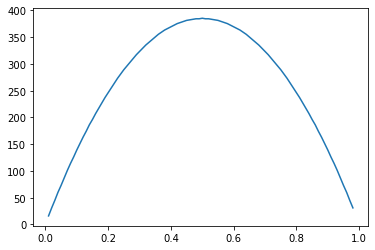

In [ ]:
prop = np.arange(0.01, 0.99, 0.01)
n = [np.ceil(samplesize_confint_proportion(p, 0.05)) for p in prop]

plt.plot(prop, n);

#### Test

Let's test a hypothesis now!

$H_0$: people do not know what backs of their hands look like and are guessing at random ($p=0.1$).

$H_1$: people are able to select a picture of their own hand better than at random ($p>0.1$).

In [ ]:
print('Z test:', proportions_ztest(11, 12, value = 0.1, alternative='larger'))

Z test: (10.235766170195031, 6.85528054545589e-25)


The function outputs the value of Z statistic and the corersponding p-value.

### Two samples, independent

The same experiment was run with the pictures of palms. 7 of 12 subjects selected a picture of their own palm. 

#### Confidence interval

Confidence interval for the difference in proportions of people knowing back of their hands and palms:

In [ ]:
print("Wald's interval:", confint_proportions_2indep(11, 12, 7, 12, method = 'wald', compare='diff'))

Wald's interval: (0.013550506137431695, 0.6531161605292348)


In theory, the same function implements Wilson's interval too. In practice, at the moment (statsmodels version 0.12.0) this function does not work:

In [ ]:
print("Wilson's interval:", confint_proportions_2indep(11, 12, 7, 12, method = 'score', compare='diff'))

ValueError: f(a) and f(b) must have different signs

Oh well! Did I mention that anything statistics related works much better in R?

#### Test

$𝐻_0$ : the same proportion of people are able to select a picture of their palms and backs of their hands( $p_1=p_2$ ).

$𝐻_1$ : people are more likely to identify a picture of the back of their hand than of the palm  ( $p_1>p_2$ ).

In [ ]:
print("Z test:", test_proportions_2indep(11, 12, 7, 12, alternative = 'larger',
                                          method = 'wald',  return_results=False))

Z test: (2.0430156738209964, 0.020525443280229438)


In [ ]:
print("Wilson's interval based test:", 
      test_proportions_2indep(11, 12, 7, 12, alternative = 'larger', 
                              method = 'score', correction=False, return_results=False))

Wilson's interval based test: (1.845916413981794, 0.0324521714914821)


### Two samples, paired

We could use confidence interval for paired samples, but the problem is that we don't know the pairings (i.e., how many people correctly guessed the palm, but not back, and vice versa. 

Given our samples though, there aren't that many options!  

Option one:

| Back \ Palm | Right | Wrong | Total |
|-------------|-------|-------|-------|
| Right       | 6     | 5     | 11    |
| Wrong       | 1     | 0     | 1     |
| Total       | 7     | 5     | 12    | 

Option two:

| Back \ Palm | Right | Wrong | Total |
|-------------|-------|-------|-------|
| Right       | 7     | 4     | 11    |
| Wrong       | 0     | 1     | 1     |
| Total       | 7     | 5     | 12    | 

There are no other tables that have the same marginal totals.

#### Confidence interval

Let's build confidence intervals for differences in proportions for both!

In [ ]:
def confint_proportions_2paired_wald(b, c, n, alpha = 0.05):
    z = sc.stats.norm.ppf(1 - alpha / 2.)
 
    CI_l = float(b - c) / n  - z * np.sqrt(float((b + c)) / n**2 - float((b - c)**2) / n**3)
    CI_u = float(b - c) / n  + z * np.sqrt(float((b + c)) / n**2 - float((b - c)**2) / n**3)
    return (CI_l, CI_u)

print("Wald's interval for option 1:", confint_proportions_2paired_wald(5, 1, 12))
print("Wald's interval for option 2:", confint_proportions_2paired_wald(4, 0, 12))

Wald's interval for option 1: (-0.019500510056176756, 0.6861671767228434)
Wald's interval for option 2: (0.06661601798026057, 0.6000506486864061)


#### Tests
We'll test the same hypothesis now, but using a test for paired samples!

$𝐻_0$ : the same proportion of people are able to select a picture of their palms and backs of their hands( $p_1=p_2$ ).

$𝐻_1$ : people are more likely to identify a picture of the back of their hand than of the palm  ( $p_1>p_2$ ).

In [ ]:
def test_proportions_2paired_wald(b, c, n, alternative = 'two-sided'):  
    if alternative not in ('two-sided', 'smaller', 'larger'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'smaller' or 'larger'")
        
    z = float(b - c) / np.sqrt(b + c - float((b - c)**2) / n )
    
    if alternative == 'two-sided':
        p = 2 * (1 - sc.stats.norm.cdf(np.abs(z)))
    
    if alternative == 'smaller':
        p = sc.stats.norm.cdf(z)

    if alternative == 'larger':
        p = 1 - sc.stats.norm.cdf(z)
    
    return(z,p)
    
print("Z test for option 1:", test_proportions_2paired_wald(5, 1, 12, alternative = 'larger'))
print("Z test for option 2:", test_proportions_2paired_wald(4, 0, 12, alternative = 'larger'))

Z test for option 1: (1.8516401995451028, 0.03203875322552974)
Z test for option 2: (2.449489742783178, 0.007152939217714871)


## Test about means

In [ ]:
import numpy as np
import pandas as pd
import scipy as sc
%pylab inline

from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

Populating the interactive namespace from numpy and matplotlib


### Data: Methylphenidate

You have already seen this dataset in videos: 24 children with ADHD had their performance measured on delay of gratification (DOG) task 60 minutes after taking Methylphenidate, and, on a different week, after taking placebo.

We want to estimate the effect of the drug.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [ ]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

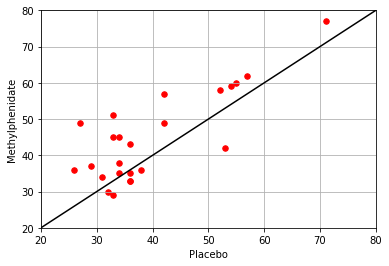

In [ ]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80));

### One sample

Assuming delay of gratification task test is well-calibrated, average score in the general population is 50. Do children with ADHD have the same average score? 

In [ ]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Placebo).tconfint_mean())

95% confidence interval: [34.972234, 44.527766]


$H_0\colon$ average DOG task score for children with ADHD is 50.

$H_1\colon$ average DOG task score for children with ADHD is not 50.

In [ ]:
print('T test:', sc.stats.ttest_1samp(data.Placebo, 50.0))

T test: Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)


### Two paired samples

Before using t-test and corresponding confidence interval, let's look at q-q plot for pairwise differences to make sure there are no gross deviations from normality:

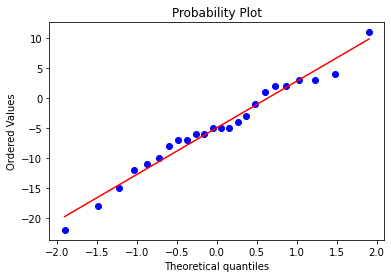

In [ ]:
sc.stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

In [ ]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean())

95% confidence interval: [1.775236, 8.141431]


$H_0\colon$ average test scores are equal for patients after drug and after placebo.

$H_0\colon$ not equal.

In [ ]:
print('T test:', sc.stats.ttest_rel(data.Methylphenidate, data.Placebo))

T test: Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)


### Two independent samples

Just for you to have an example of the code, let's analyze these samples as if they were independent (which is, of course, false - they are paired!). 

Before using t-test and corresponding confidence interval, let's look at q-q plots to make sure there are no gross deviations from normality:

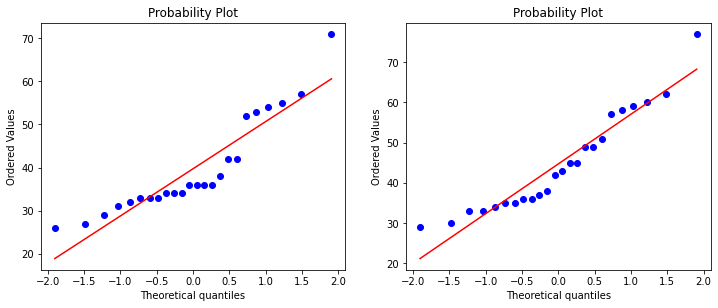

In [ ]:
pylab.figure(figsize=(12,10))
pylab.subplot(2,2,1)
sc.stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
sc.stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

## Tests about distributions

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data: speed of light
The following dataset consists of the results of a classic Michelson experiment (1880) - speed of light was measured with a rotating mirror. Could the measurements be well aproximated by normal distribution?

In [ ]:
light_data = pd.read_csv('light speed.txt', sep='\t', header=None)
light_data.columns = ['speed']
light_data.head()

,speed
0,299850
1,299740
2,299900
3,300070
4,299930


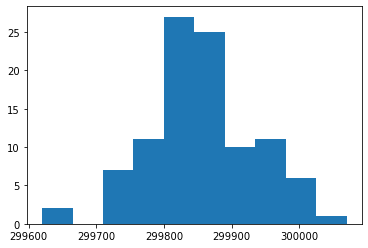

In [ ]:
pylab.hist(light_data.speed);

q-q plot for our sample:

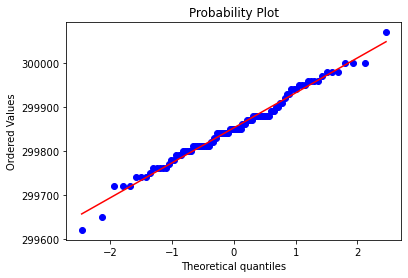

In [ ]:
stats.probplot(light_data.speed, dist = "norm", plot = pylab);

You can see that the points lie quite close to the line, which means that the sample is quite well approximated by normal distribution. But let's use statistical tests to check the ormality more formally.

### Chi-squared goodness-of-fit test
$H_0$: speed of light measurements come from normal distibution

$H_1$: $H_0$ is false

To run chi-squared test, we need to:
1. create bins over the sample's range
2. count the number of observations in each bin
3. estimate parameters of the distribution we assume in $H_0$ (in this case, $H_0$ states normal distribution, se we need to estimate its mean and variance)
4. calculate expected counts in all bins under that distribution
5. compare observed and expected counts with chi-squared test

Let's take 1 and 2 from the standard histogram we just plotted:

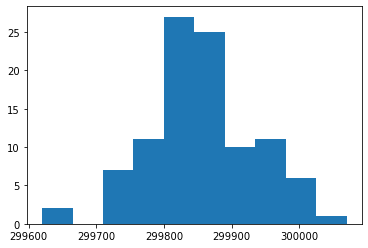

In [ ]:
tmp = pylab.hist(light_data.speed)
bins = tmp[1]
observed_counts = tmp[0]

3 – to fit normal distribution to the data, we need to estimate its mean and variance. We'll use sample mean and variance:

In [ ]:
h0_dist = stats.norm(loc = light_data.speed.mean(), scale = light_data.speed.std(ddof=1))

4 – expected counts:

In [ ]:
cdf_at_bin_boundaries = h0_dist.cdf(bins)
expected_counts = [len(light_data) * (t - s) for s, t in zip(cdf_at_bin_boundaries, cdf_at_bin_boundaries[1:])]

5 – finally, let's compare the counts:

In [ ]:
stats.chisquare(f_obs = observed_counts, f_exp = expected_counts,
                ddof = 2) # because we estimated two parameters of the distribution from the sample


Power_divergenceResult(statistic=12.24548630525224, pvalue=0.09276947469231883)

### Anderson-Darling test
There's a finction is scipy for Anderson-Darling test! For some reason it only allows to test if the sample comes from one of these distributions: ‘norm’, ‘expon’, ‘logistic’, ‘gumbel’, ‘gumbel_l’, ‘gumbel_r’, ‘extreme1’. Luckily, normal distribution is one of them, so we can use the function for our problem:

In [ ]:
stats.anderson(light_data.speed, dist='norm')

AndersonResult(statistic=0.46076385565218914, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Wow, the function does not actually calculate p-value - instead it returns something very oldschool: value fo the statistic and a table of critical values it should be compared with. Critical values are precomputed for significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), which means $\alpha$ = [0.15, 0.1, 0.05, 0.025, 0.01]. 

In our case the value of the statistic 0.46 is smaller than the largest critical value corresponding to $\alpha=0.15$, which means that for our data $p>0.15$ and null hypothesis is not rejected at 0.05.

Just to make sure you understand how to work with critical values: assume you had observed value of the statistic equal to 0.8. It lies between critical values for $\alpha=0.05$ and $\alpha=0.025$, which means that the p-value is between 0.025 and 0.05.

R is so much better at this!

### Shapiro-Wilk test
If you need to test normality, the best choice is Shapiro-Wilk test: it is designed specifically to test the hypothesis of normality, and has higher power than more general chi-squared and Anderson-Darling tests (which in theory can test hypothesis that your sample comes from any distribution).

In [ ]:
stats.shapiro(light_data.speed)

ShapiroResult(statistic=0.9880793690681458, pvalue=0.5140784382820129)

Again, the null hypothesis is not rejected.

In [ ]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-1.915927, 11.832593]


$H_0\colon$ average test scores are equal for patients after drug and after placebo.

$H_0\colon$ not equal.

In [ ]:
print('T test:', sc.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False))

T test: Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)


## Nonparametric tests

In [ ]:
import numpy as np
import pandas as pd
import scipy as sc
import itertools

from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### One sample

#### Data: laboratory mice and mirrors

16 laboratory mice were placed in two-room cages with a mirror in one of the rooms. To establish whether mice have any preferences for mirrors, a proportion of time spent in each of he rooms was measured for each mouse. 

Sherwin, C.M. (2004) Mirrors as potential environmental enrichment for individually housed laboratory mice. Applied Animal Behaviour Science, 87(1–2), 95-103.

In [ ]:
mice_data = pd.read_csv('mirror_mice.txt', header = None)
mice_data.columns = ['proportion_of_time']
mice_data.head()

,proportion_of_time
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444


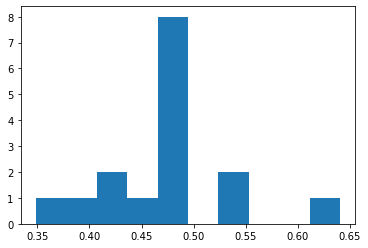

In [ ]:
pylab.hist(mice_data.proportion_of_time);

In [ ]:
print('95% confidence interval for the mean proportion of time:', zconfint(mice_data))

95% confidence interval for the mean proportion of time: (array([0.44291783]), array([0.50765996]))


#### Sign and signed rank tests

$H_0\colon$ median proportion of time spent in the room with the mirror is 0.5

$H_1\colon$ median proportion of time spent in the room with the mirror is not 0.5

In [ ]:
print("Sign test:", sign_test(mice_data, mu0=0.5))
print("Signed rank test:", sc.stats.wilcoxon(mice_data.proportion_of_time - 0.5))

Sign test: (-5.0, 0.021270751953125)
Signed rank test: WilcoxonResult(statistic=35.0, pvalue=0.09344482421875)


#### Permutation test

$H_0\colon$ mean proportion of time spent in the room with the mirror is 0.5

$H_1\colon$ mean proportion of time spent in the room with the mirror is 0.5

Permutation test is not available in standard packages - let's implement it ourselves!

In [ ]:
def permutation_t_stat_1s(sample, mean):
    t_stat = sum(sample - mean)
    return t_stat

def permutation_null_distr_1s(sample, mean, max_permutations = None):
    centered_sample = sample - mean
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [permutation_t_stat_1s(centered_sample * np.array(signs), 0) for signs in signs_array]
    return distr

def permutation_test_1s(sample, mean, max_permutations = None, alternative = 'two-sided', return_distr = False):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1s(sample, mean)
    
    null_distr = permutation_null_distr_1s(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        p = sum([1. if abs(x) >= abs(t_stat) else 0. for x in null_distr]) / len(null_distr)
    elif alternative == 'less':
        p = sum([1. if x <= t_stat else 0. for x in null_distr]) / len(null_distr)
    else: # alternative == 'greater':
        p = sum([1. if x >= t_stat else 0. for x in null_distr]) / len(null_distr)
        
    if return_distr:
        return {'t': t_stat, 'p': p, 'null_distr': null_distr}
    else:
        return {'t': t_stat, 'p': p}

If the parameter max_permutations is not set, the function would use all the permutations (might be slow).

In [ ]:
res = permutation_test_1s(mice_data.proportion_of_time, 0.5, return_distr=True)
print("Permutation test: t = %f, p = %f" % (res['t'], res['p']))

Permutation test: t = -0.395378, p = 0.157776


Here's the null distribution of the permutation test statistic for our data; we don't have to look at it, but it might be a good idea - to check whether it's not too discrete:

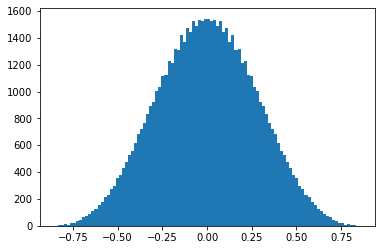

In [ ]:
pylab.hist(res['null_distr'], bins = 100);

### Two paired samples

#### Data: cognitive behaviour therapy for anorexia
For 29 young girls with anorexia we have weight measurements before and after they went through cognitive behaviour therapy. 

Everett, as cited in Hand et al. (1994) A Handbook of Small Datasets. 

In [ ]:
weight_data = pd.read_csv('weight.txt', sep = '\t', header = 0)
weight_data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


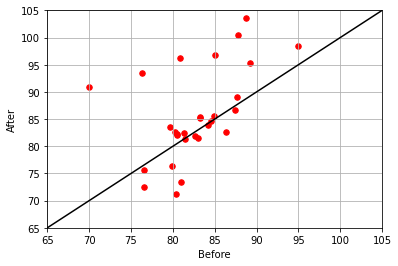

In [ ]:
weight_data.plot.scatter('Before', 'After', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(110), c = 'black')
pylab.xlim((65, 105))
pylab.ylim((65, 105));

#### Sign and signed rank tests

$H_0\colon$ median weight change from before to after the treatment is 0.

$H_1\colon$ median weight change from before to after the treatment is not 0.

In [ ]:
print("Sign test:", sign_test(weight_data.After - weight_data.Before))
print("Signed rank test:", sc.stats.wilcoxon(weight_data.After, weight_data.Before))

Sign test: (3.5, 0.26493089646101)
Signed rank test: WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)


#### Permutation test

$H_0\colon$ mean weight change is 0.

$H_1\colon$ mean weight change is not 0.

We'll use functions defined above in the one sample section, and set max_permutations = 10000 for speed. 

In [ ]:
res = permutation_test_1s(weight_data.After - weight_data.Before, 0., max_permutations = 10000, return_distr = True)
print("Permutation test: t = %f, p = %f" % (res['t'], res['p']))

Permutation test: t = 87.200000, p = 0.038000


Null distribution of the permutation test statistic for our data:

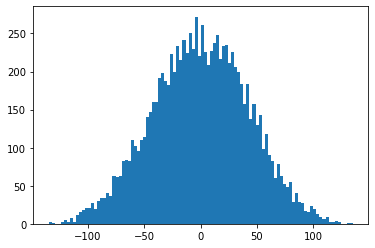

In [ ]:
pylab.hist(res['null_distr'], bins=100);

### Two independent samples

#### Data:  real estate sales in Seattle
We have selling prices for Seattle real estate sales (in thousands of dollars), 50 records for 2001 and 50 for 2002. Did the average price change?

Hestberg, T., Monaghan, S., Moore, D.S., Clipson, A., Epstein, R. (2003) Bootstrap methods and permutation tests. 

In [ ]:
seattle_data = pd.read_csv('seattle.txt', sep = '\t', header = 0)
seattle_data.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


In [ ]:
prices2001 = seattle_data[seattle_data['Year']  == 2001].Price
prices2002 = seattle_data[seattle_data['Year']  == 2002].Price

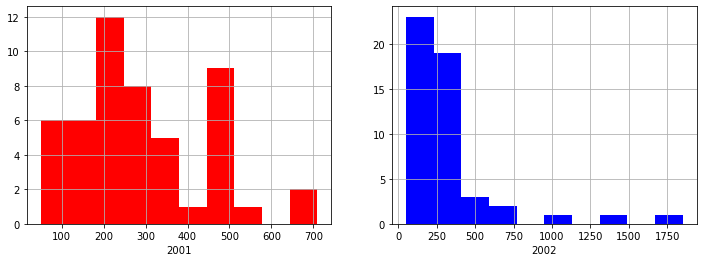

In [ ]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(prices2001, color = 'r')
pylab.xlabel('2001')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(prices2002, color = 'b')
pylab.xlabel('2002');

#### Mann-Whitney rank test

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [ ]:
print("Mann-Whitney test:", sc.stats.mannwhitneyu(prices2001, prices2002))

Mann-Whitney test: MannwhitneyuResult(statistic=1204.5, pvalue=0.3781936337850874)


#### Permutation test
$H_0\colon$ average prices are the same in 2001 and 2002.

$H_1\colon$ average prices are not the same in 2001 and 2002.

In [ ]:
def permutation_t_stat_2s(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_permutations):
    index = np.array(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_permutations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_null_dist_2s(sample1, sample2, max_permutations = None):
    pooled_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n2 = len(sample2)
    n = n1 + n2
    
    if max_permutations:
        indices = get_random_combinations(n1, n2, max_permutations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [permutation_t_stat_2s(pooled_sample[list(i[0])], pooled_sample[list(i[1])]) \
             for i in indices]
    return distr

def permutation_test_2s(sample1, sample2, max_permutations = None, alternative = 'two-sided', return_distr = False):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_2s(sample1, sample2)
    
    null_distr = permutation_null_dist_2s(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        p = sum([1. if abs(x) >= abs(t_stat) else 0. for x in null_distr]) / len(null_distr)
    elif alternative == 'less':
        p = sum([1. if x <= t_stat else 0. for x in null_distr]) / len(null_distr)
    else: # alternative == 'greater':
        p = sum([1. if x >= t_stat else 0. for x in null_distr]) / len(null_distr)
    
    if return_distr:
        return {'t': t_stat, 'p': p, 'null_distr': null_distr}
    else:
        return {'t': t_stat, 'p': p}

In [ ]:
res = permutation_test_2s(prices2001, prices2002, max_permutations = 10000, return_distr = True)
print("Permutation test: t = %f, p = %f" % (res['t'], res['p']))

Permutation test: t = -40.330600, p = 0.439900


For two independent samples, it might be beneficial to look at permutation distribution. If groups are of different sizes and distributions in both of them are skewed, we should be careful when testing hypothesis against two-sided alternative: if permutation distribution is asymmetric, the power of the test could be very low. Null distribution of the permutation test statistic for our data:

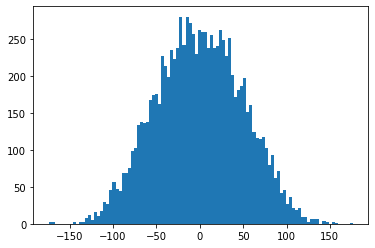

In [ ]:
pylab.hist(res['null_distr'], bins = 100);

Looks quite symmetric – we're safe.

## Hypotheses about independence

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data: GSS happiness vs. trust in people
In this example we are going to look at another pair of questions from General Social Survey conducted in 2018. 

Question 1: Taken all together, how would you say things are these days – would you say that you are very happy, pretty happy, or not too happy?

Question 2: Generally speaking, would you say that most people can be trusted or that you can't be too careful in dealing with people?

Are answers to these questions independent?

In [ ]:
gss_data = pd.read_csv('happiness_trust.csv')
gss_data.head()

,happiness,trust
0,Very happy,Can trust
1,Very happy,Can't be too careful
2,Very happy,Can trust
3,Pretty happy,Can trust
4,Pretty happy,Can't be too careful


In [ ]:
ct = pd.crosstab(gss_data.happiness, gss_data.trust)
ct

trust,Can trust,Can't be too careful,Depends
happiness,,,
Not too happy,43,197,9
Pretty happy,270,535,40
Very happy,179,260,19


### Chi squared test for independence
$H_0$: happiness and trust in people are independent

$H_1$: $H_0$ is false

In [ ]:
stats.chi2_contingency(ct)

(37.58945272647462,
 1.3617693470270765e-07,
 4,
 array([[ 78.93556701, 159.15463918,  10.90979381],
        [267.87371134, 540.10309278,  37.02319588],
        [145.19072165, 292.74226804,  20.06701031]]))

$p=1.4\times10^{-7}<0.05$ – null hypothesis is rejected. None of the expected counts (the array returned above) are below 5, so chi-squared test is accurate.

### Permutation test for independence

Chi squared test is perfectly fine for this dataset since the expected counts are quite high (so the approximation is valid), but let's apply permutation test anyway – so you'll have an example of it.

In [ ]:
def permutation_stat_cat_ind(sample1, sample2):
    ct = pd.crosstab(sample1, sample2)
    return stats.chi2_contingency(ct)[0]

def get_random_permutations(n, max_permutations):
    index = np.array(range(n))
    indices = set([tuple(index)])        
    for i in range(max_permutations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return list(indices)

def permutation_null_dist_cat_ind(sample1, sample2, max_permutations = None):
    if not len(sample1) == len(sample2):
        raise ValueError("Samples should be paired and have the same size")
        
    n = len(sample1)
    
    if max_permutations:
        indices = get_random_permutations(n, max_permutations)
    else:
        indices = list(itertools.permutations(list(range(n))))
    
    distr = [permutation_stat_cat_ind(sample1, sample2[list(i)]) for i in indices]
    return distr

def permutation_test_cat_ind(sample1, sample2, max_permutations = None, return_distr = False):    
    t_stat = permutation_stat_cat_ind(sample1, sample2)
    
    null_distr = permutation_null_dist_cat_ind(sample1, sample2, max_permutations)
    
    p = sum([1. if x >= t_stat else 0. for x in null_distr]) / len(null_distr)
        
    if return_distr:
        return {'t': t_stat, 'p': p, 'null_distr': null_distr}
    else:
        return {'t': t_stat, 'p': p}

In [ ]:
res= permutation_test_cat_ind(gss_data.happiness.values, gss_data.trust.values, 
                              max_permutations = 10000, return_distr = True)
print("Permutation test: t = %f, p = %f" % (res['t'], res['p']))

Permutation test: t = 37.589453, p = 0.000100


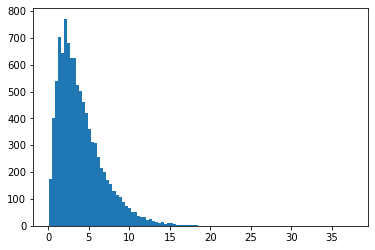

In [ ]:
pylab.hist(res['null_distr'], bins = 100);

### Follow-up: standardized Pearson residuals

In [ ]:
def st_pearson_residuals(ct):
    e = stats.chi2_contingency(ct)[3]
    r = e
    n_plus_j = sum(ct, axis=0)
    n_i_plus = sum(ct, axis=1)
    n = sum(n_plus_j)
    for i in range(len(n_i_plus)):
        for j in range(len(n_plus_j)):
            r[i,j] = (ct.values[i,j] - e[i,j]) / np.sqrt(e[i,j] * (1 - n_i_plus[i] / n) * (1 - n_plus_j[j] / n))
    return pd.DataFrame(data=r, index = ct.index, columns = ct.columns)
    

In [ ]:
st_pearson_residuals(ct)

trust,Can trust,Can't be too careful,Depends
happiness,,,
Not too happy,-5.341395,5.450401,-0.645328
Pretty happy,0.232909,-0.541606,0.741273
Very happy,4.043864,-3.794505,-0.290130


Looks like unhappy people trust people less, and happy people trust people more than it would have been if these two variables were independent!

## Familywise error rare and FRD
*Use when want to adjust p-values because of multiple hypothesis testing*

UDF:


1.   **adjust_p_value_holms**
2.   **adjust_p_value_bonferroni**
3.   **adjust_p_value_fdr_bh**


### Data: gene expression in white blood cells

We have data from the analysis of gene expression (level of activity of a gene) in white blood cells of children with severe therapy-resistant asthma, and healthy controls. Results provide insight into the molecular pathogenesis of  asthma. Data is collected with DNA microarrays: https://en.wikipedia.org/wiki/DNA_microarray

We would like to understand which genes have different average activity levels between healthy and diseased groups.

Data source: http://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS4896

In [3]:
expression = pd.read_csv('https://raw.githubusercontent.com/serzaraisk/Statistics/main/Input_data/expression.csv')

In [4]:
expression.head()

,ID_REF,IDENTIFIER,Healthy control,Healthy control.1,Healthy control.2,Healthy control.3,Healthy control.4,Healthy control.5,Healthy control.6,Healthy control.7,Healthy control.8,Healthy control.9,Healthy control.10,Healthy control.11,Healthy control.12,Healthy control.13,Healthy control.14,Healthy control.15,Healthy control.16,Healthy control.17,Severe asthma,Severe asthma.1,Severe asthma.2,Severe asthma.3,Severe asthma.4,Severe asthma.5,Severe asthma.6,Severe asthma.7,Severe asthma.8,Severe asthma.9,Severe asthma.10,Severe asthma.11,Severe asthma.12,Severe asthma.13,Severe asthma.14,Severe asthma.15,Severe asthma.16,Gene title
0,7933640,A1CF,4.24505,4.44464,4.36671,4.33497,4.45717,4.37972,4.40154,4.40521,4.47127,4.44672,4.40599,4.58952,4.29390,4.25316,4.52737,4.47072,4.30119,4.64295,4.36226,4.47737,4.36314,4.61266,4.42906,4.26465,4.44100,4.49613,4.59426,4.56012,4.60672,4.43026,4.55835,4.25656,4.52559,4.42976,4.37098,APOBEC1 complementation factor
1,7960947,A2M,4.79868,4.76833,4.66414,4.80272,4.85779,4.77622,4.92634,4.88576,5.00332,4.85915,4.46532,4.94817,4.79247,4.93248,4.86576,5.09963,4.76455,4.66645,5.27952,4.98797,5.06507,5.39660,4.80585,5.24319,5.21687,4.72301,5.01994,5.15406,5.13639,4.99052,4.88454,4.68904,4.85329,5.05764,5.48561,alpha-2-macroglobulin
2,7953775,A2ML1,4.79161,5.12633,4.93860,4.74597,4.91789,4.74453,5.23725,4.83903,4.91834,5.03532,4.76297,4.97604,4.86944,4.95659,5.05354,5.10546,5.11785,5.18866,4.62426,4.87333,4.91667,4.89983,4.86967,4.97828,5.18958,4.68325,5.22915,5.11131,5.33257,5.05544,4.96971,4.96505,4.76993,5.04489,4.70002,alpha-2-macroglobulin-like 1
3,8076497,A4GALT,5.79783,5.93942,5.82935,5.91139,5.60195,5.68317,6.01254,5.84921,6.10868,5.98903,5.45565,5.89648,5.62721,5.69318,5.89079,6.00670,5.83917,6.11561,5.65212,5.85599,6.02792,5.97044,5.89552,5.60008,5.84638,5.80428,6.16251,6.21829,6.06835,5.80154,6.06533,5.79955,5.94065,6.08192,5.86693,"alpha 1,4-galactosyltransferase"
4,8090955,A4GNT,3.79685,4.00154,3.83103,3.91021,3.81930,3.86203,3.97020,3.84166,3.96387,3.84821,3.85158,3.95916,3.90199,3.78189,3.86358,4.07321,3.80914,4.06682,3.78357,3.81996,3.64056,4.10096,4.13633,3.75070,4.03031,3.89729,4.17925,3.99698,4.09657,4.00232,3.70843,3.79290,4.31364,3.94925,3.62481,"alpha-1,4-N-acetylglucosaminyltransferase"


In [5]:
print("Number of genes in the study:", expression.shape[0])
healthy = [col for col in expression if col.startswith('Healthy')]
print("Number of healthy controls:", len(healthy))
asthma = [col for col in expression if col.startswith('Severe')]
print("Number of children with severe asthma:", len(asthma))

Number of genes in the study: 21465
Number of healthy controls: 18
Number of children with severe asthma: 17


In [6]:
expression['mean_healthy'] = expression[healthy].apply(np.mean, axis=1)
expression['mean_asthma'] = expression[asthma].apply(np.mean, axis=1)

For each gene, we are going to compare average expression levels between healthy children and children with severe asthma using t test:

In [7]:
def compare_groups(row):
    p = sc.stats.ttest_ind(row[healthy], row[asthma], equal_var = False).pvalue
    return p

expression['p'] = expression.apply(compare_groups, axis=1)

How many genes have significantly different average expression levels – without accounting for multiple hypotheses testing?

In [8]:
print('Number of significant differences, no correction for multiplicity:', sum(expression.p <= 0.05))

Number of significant differences, no correction for multiplicity: 2772


### Holm's method

Let's correct for multiple hypothesis testing using Holm's method to control FWER:

In [14]:
#_, expression['p_adjusted_holm'], _, _ = multipletests(expression.p, alpha = 0.05, method = 'holm') 
expression['p_adjusted_holm'] = adjust_p_value_holms(expression.p)
print('Number of significant differences with FWER <= 0.05:', sum(expression.p_adjusted_holm <= 0.05))
expression[expression.p_adjusted_holm <= 0.05][['IDENTIFIER', 'Gene title', 'mean_healthy', 'mean_asthma', 
                                                'p', 'p_adjusted_holm']]

Number of significant differences with FWER <= 0.05: 9


,IDENTIFIER,Gene title,mean_healthy,mean_asthma,p,p_adjusted_holm
431,AGPAT4-IT1,AGPAT4 intronic transcript 1 (non-protein coding),5.591794,5.906907,5.504217e-07,0.011812
2865,CD4,CD4 molecule,10.332761,9.994222,2.169653e-06,0.046554
7128,GPR21,G protein-coupled receptor 21,5.907257,6.853551,3.304167e-08,0.000709
7144,GPR52,G protein-coupled receptor 52,6.284526,7.202818,1.456452e-08,0.000313
10186,LPP,LIM domain containing preferred translocation ...,8.943248,9.276649,1.816116e-07,0.003897
12641,OCR1,ovarian cancer-related protein 1,7.043893,8.379184,9.935442e-08,0.002132
17245,SND1-IT1,SND1 intronic transcript 1 (non-protein coding),5.543953,6.252731,3.057326e-08,0.000656
18225,SYNE2,"spectrin repeat containing, nuclear envelope 2",8.603884,9.020421,1.323281e-06,0.028395
20763,ZEB2,zinc finger E-box binding homeobox 2,6.341786,7.358729,3.958029e-08,0.000849


Just for comparison – here's what we would get using Bonferroni's correction:

In [15]:
#_, expression['p_adjusted_bonf'], _, _ = multipletests(expression.p, alpha = 0.05, method = 'bonferroni') 
expression['p_adjusted_bonf'] = adjust_p_value_bonferroni(expression.p)
expression[expression.p_adjusted_bonf <= 0.05][['IDENTIFIER', 'Gene title', 'mean_healthy', 'mean_asthma', 
                                                'p', 'p_adjusted_bonf']]

,IDENTIFIER,Gene title,mean_healthy,mean_asthma,p,p_adjusted_bonf
431,AGPAT4-IT1,AGPAT4 intronic transcript 1 (non-protein coding),5.591794,5.906907,5.504217e-07,0.011815
2865,CD4,CD4 molecule,10.332761,9.994222,2.169653e-06,0.046572
7128,GPR21,G protein-coupled receptor 21,5.907257,6.853551,3.304167e-08,0.000709
7144,GPR52,G protein-coupled receptor 52,6.284526,7.202818,1.456452e-08,0.000313
10186,LPP,LIM domain containing preferred translocation ...,8.943248,9.276649,1.816116e-07,0.003898
12641,OCR1,ovarian cancer-related protein 1,7.043893,8.379184,9.935442e-08,0.002133
17245,SND1-IT1,SND1 intronic transcript 1 (non-protein coding),5.543953,6.252731,3.057326e-08,0.000656
18225,SYNE2,"spectrin repeat containing, nuclear envelope 2",8.603884,9.020421,1.323281e-06,0.028404
20763,ZEB2,zinc finger E-box binding homeobox 2,6.341786,7.358729,3.958029e-08,0.000850


It's the same 9 genes! We test so many hypotheses here that even the more powerful Holm's method is not able to reject more than Bonferroni's – controlling FWER is probably too strict.

### Benjamini-Hochberg's method
DNA microarrays are an exploratory tool – they are used to generate scientific hypotheses that later could be tested with more precise instruments. It might make sense to allow some type I errors to be able to have higher power.

Let's correct for multiple hypothesis testing using Benjamini-Hochberg's method to control FDR (as they usually do in microarray analysis):

In [16]:
#_, expression['p_adjusted_bh'], _, _ = multipletests(expression.p, alpha = 0.05, method = 'fdr_bh') 
expression['p_adjusted_bh'] = adjust_p_value_fdr_bh(expression.p)
print('Number of significant differences with FDR <= 0.05:', sum(expression.p_adjusted_bh <= 0.05))
with pd.option_context('display.max_rows', None):
    display(expression[expression.p_adjusted_bh <= 0.05][['IDENTIFIER', 'Gene title', 'mean_healthy', 
                                                          'mean_asthma', 'p', 'p_adjusted_bh']])

Number of significant differences with FDR <= 0.05: 168


,IDENTIFIER,Gene title,mean_healthy,mean_asthma,p,p_adjusted_bh
18,AAR2,AAR2 splicing factor homolog (S. cerevisiae),8.176038,7.995185,2.287793e-04,0.041617
135,ACBD3,acyl-CoA binding domain containing 3,9.503262,9.249920,6.883657e-06,0.008859
261,ADAM20,ADAM metallopeptidase domain 20,5.073112,5.413564,2.536561e-04,0.043725
315,ADCK2,aarF domain containing kinase 2,6.407213,6.209225,3.493704e-04,0.048863
431,AGPAT4-IT1,AGPAT4 intronic transcript 1 (non-protein coding),5.591794,5.906907,5.504217e-07,0.001688
582,ALKBH5,"AlkB family member 5, RNA demethylase",9.254869,9.035186,3.887820e-05,0.018019
662,ANGPTL1,angiopoietin-like 1,3.591168,3.921505,1.794481e-04,0.039998
738,ANKRD36,ankyrin repeat domain 36///ankyrin repeat doma...,8.897997,9.319184,3.227949e-05,0.016113
777,ANP32A-IT1,ANP32A intronic transcript 1 (non-protein coding),6.779091,7.190945,2.939759e-04,0.045086
854,APH1A,APH1A gamma secretase subunit,8.620867,8.342951,2.096931e-05,0.014390


## Linear regression

In [ ]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data: attractiveness vs. wage

For 1260 study subjects the following variables are measured:

* hourly wage, $
* work experience, years
* education, years
* attractiveness on scale from 1 to 5 (scored by other participants)
* binary features: gender (m/f), marital status (married/not married), health (good/not good), union membership (yes/no), race (black/non-black), employment in service industry (yes/no)

We want to estimate salary differences between people with different levels of attractiveness, while accounting for differences in other features. 

Hamermesh D.S., Biddle J.E. (1994) Beauty and the Labor Market, American Economic Review, 84, 1174–1194.

In [ ]:
raw = pd.read_csv("wages.csv", sep=";", index_col=False) 
raw.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


Scatterplot matrix for continious features:

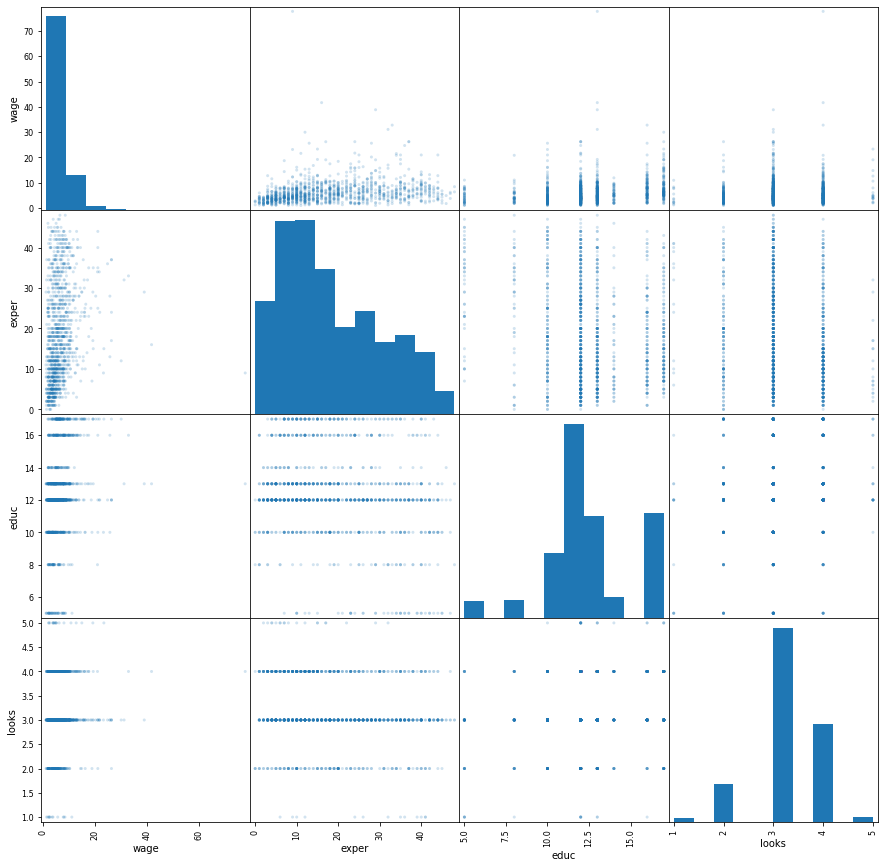

In [ ]:
pd.plotting.scatter_matrix(raw[['wage', 'exper', 'educ', 'looks']], alpha=0.2, 
                                 figsize=(15, 15), diagonal='hist');

Checking whether sample is well balanced on binary features:

In [ ]:
print(raw.union.value_counts())
print(raw.goodhlth.value_counts())
print(raw.black.value_counts())
print(raw.female.value_counts())
print(raw.married.value_counts())
print(raw.service.value_counts())

0    917
1    343
Name: union, dtype: int64
1    1176
0      84
Name: goodhlth, dtype: int64
0    1167
1      93
Name: black, dtype: int64
0    824
1    436
Name: female, dtype: int64
1    871
0    389
Name: married, dtype: int64
0    915
1    345
Name: service, dtype: int64


Every feature has enough samples with each of the values, so we're good here. 

### Preprocessing

In [ ]:
data = raw.copy()

Let's take a look at the target variable distribution:

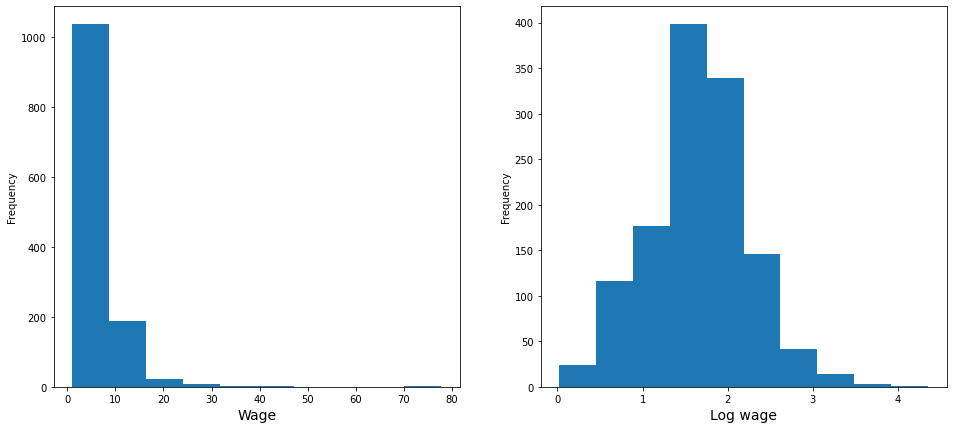

In [ ]:
plt.figure(figsize(16,7))
plt.subplot(121)
data['wage'].plot.hist()
plt.xlabel('Wage', fontsize=14)

plt.subplot(122)
np.log(data['wage']).plot.hist()
plt.xlabel('Log wage', fontsize=14);

One person in the sample gets 77.72 dollars an hour, all the rest  — less than 45 dollars; it would be better if we remove that person from the sample because regression tends to overfit to outliers. Since we want to build a model of mean salary, it would be more stable if we focus on areas of the wage distribution that have good coverage in our sample. 

In [ ]:
data = data[data['wage'] < 77]

Let's take a look at the distribution of attractiveness scores:

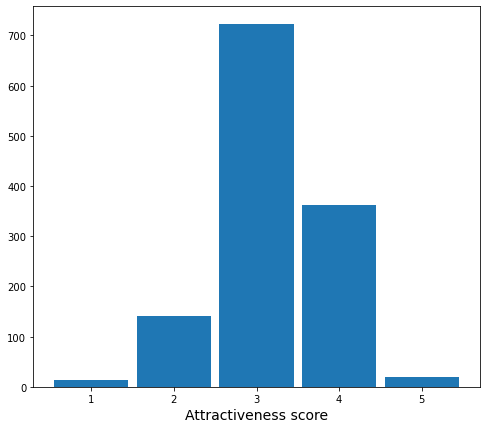

In [ ]:
plt.figure(figsize(8,7))
data.groupby('looks')['looks'].agg(lambda x: len(x)).plot(kind='bar', width=0.9)
plt.xticks(rotation=0)
plt.xlabel('Attractiveness score', fontsize=14);

There are very few observations with looks=1 and looks=5. Let's turn this feature into a categorical one and encode it with two binary variables: one would be 1 if the person's attractiveness score is above average (>3), and another – if it's below average (<3).

In [ ]:
data['belowavg'] = (data.looks < 3).astype(int)
data['aboveavg'] = (data.looks > 3).astype(int)
data.drop('looks', axis=1, inplace=True)

Data now:

In [ ]:
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,belowavg,aboveavg
0,5.73,30,0,1,0,1,1,1,14,0,1
1,4.28,28,0,1,0,1,1,0,12,0,0
2,7.96,35,0,1,0,1,0,0,10,0,1
3,11.57,38,0,1,0,0,1,1,16,0,0
4,11.42,27,0,1,0,0,1,0,16,0,0


### Building a model

#### Version 1
Linear regression model on all features:

In [ ]:
m1 = smf.ols('wage ~ exper + union + goodhlth + black + female + married +'\
                    'service + educ + belowavg + aboveavg', 
             data=data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     44.31
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.42e-75
Time:                        13:55:42   Log-Likelihood:                -3402.9
No. Observations:                1259   AIC:                             6828.
Df Residuals:                    1248   BIC:                             6884.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5898      0.743     -0.793      0.4



Overall $R^2$ is quite low – the model is not great, which might indicate both that the model is bad or that the prediction problem is difficult.

Let's take a loot at the distribution of residuals:

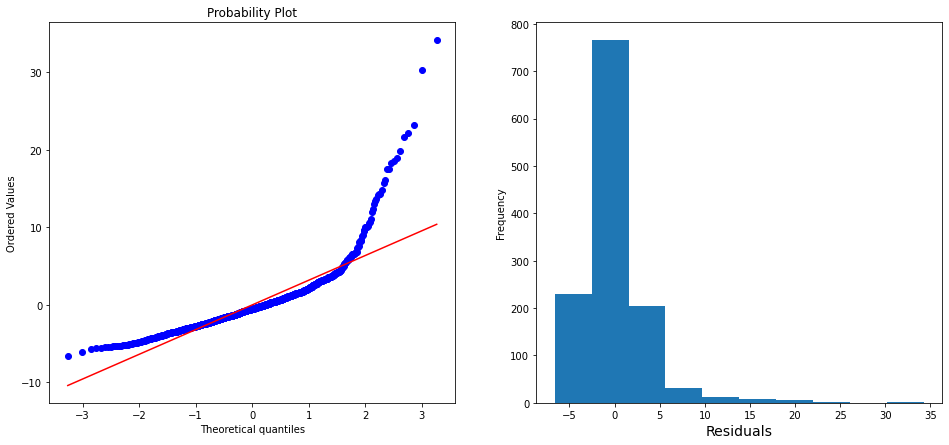

In [ ]:
plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14);

It is quite skewed, just like the target variable itself. It means that the assumption of gaussian noise is far from truth in this model, and as a result of that we can't trust statistical tests for the significance of the coefficients. In situations like this sometimes it helps to build regression model for the log of the target variable instead. 

#### Version 2 – log wage target

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     77.63
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          1.18e-123
Time:                        13:55:43   Log-Likelihood:                -816.90
No. Observations:                1259   AIC:                             1656.
Df Residuals:                    1248   BIC:                             1712.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4515      0.095      4.737      0.0

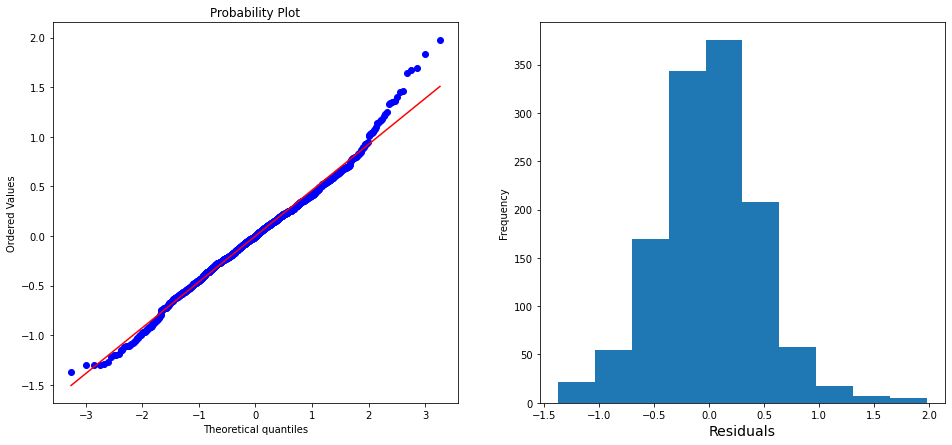

In [ ]:
m2 = smf.ols('np.log(wage) ~ exper + union + goodhlth + black + female + married +'\
                            'service + educ + belowavg + aboveavg', data=data)
fitted = m2.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14);

Looks better! 

Let's look at residuals vs. continious features:

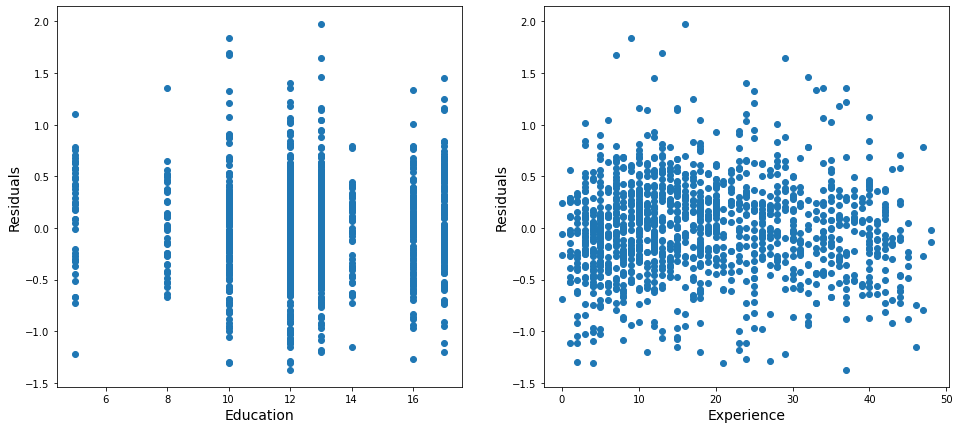

In [ ]:
plt.figure(figsize(16,7))
plt.subplot(121)
scatter(data['educ'],fitted.resid)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(122)
scatter(data['exper'],fitted.resid)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Residuals', fontsize=14);

On the right plot you might spot a quadratic dependence of the residuals on the work experience variable. It suggests a potential quadratic dependence of the target on work experience as well. Let's add it into the model.

#### Version 3 – with squared work experience

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     76.46
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          3.19e-131
Time:                        13:55:43   Log-Likelihood:                -796.86
No. Observations:                1259   AIC:                             1618.
Df Residuals:                    1247   BIC:                             1679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3424      0

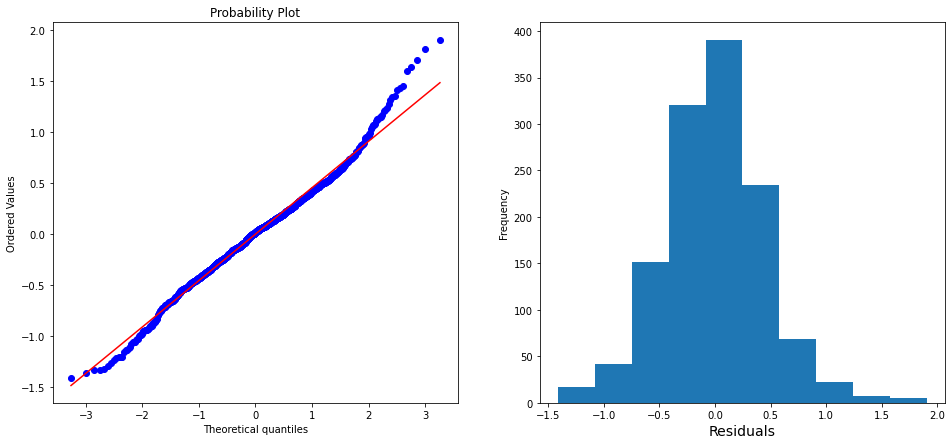

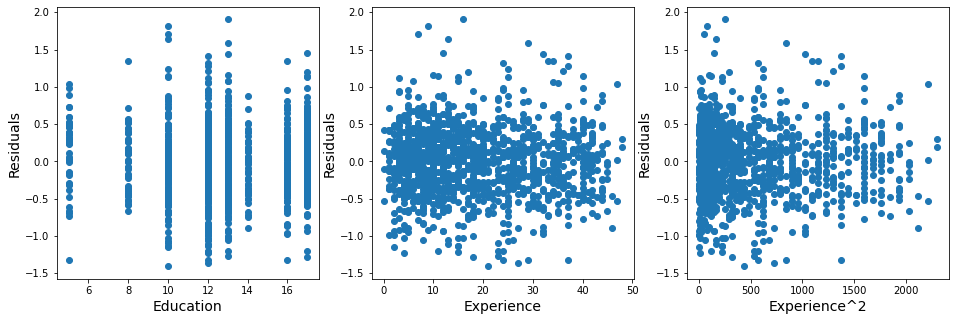

In [ ]:
m3 = smf.ols('np.log(wage) ~ exper + np.power(exper,2) + union + goodhlth + black + female +'\
                            'married + service + educ + belowavg + aboveavg', data=data)
fitted = m3.fit()
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14)
plt.figure(figsize(16,5))
plt.subplot(131)
scatter(data['educ'],fitted.resid)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(132)
scatter(data['exper'],fitted.resid)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(133)
scatter(data['exper']**2,fitted.resid)
plt.xlabel('Experience^2', fontsize=14)
plt.ylabel('Residuals', fontsize=14);

We might want to exclude some unimportant features to reduce the variance of the estimates. But, before looking at features' significance in the model, let's make sure the error is homoscedastic – otherwise p-values might be incorrect for t tests.

Breusch-Pagan test for homoscedasticity:

In [ ]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000004


The error is heteroscedastic! We can adjust for that by using White's correction for heteroscedasticity – it is done by providing cov_type parameter for the fit(). There are several types of White's correction (and it's not very clear if any of those types are better than others); we are going to use type 1  – cov_type='HC1'.

#### Version 4 – with tests adjusted for heteroscedasticity

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     87.29
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          4.23e-146
Time:                        13:55:44   Log-Likelihood:                -796.86
No. Observations:                1259   AIC:                             1618.
Df Residuals:                    1247   BIC:                             1679.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3424      0

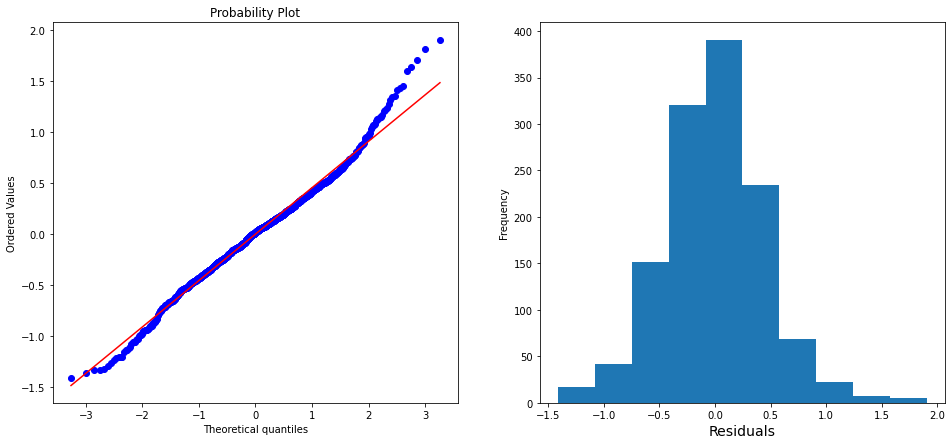

In [ ]:
m4 = smf.ols('np.log(wage) ~ exper + np.power(exper,2) + union + goodhlth + black + female +'\
                            'married + service + educ + belowavg + aboveavg', data=data)
fitted = m4.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14);

#### Version 5 – without some unimportant predictors

P>|z| column in the output of the model summary contains p-values for all features. In the previous model, the following features are not significant (have p-values > 0.05): race, health, martial status – let's try to remove them. The indicator of the attractiveness above average is not significant too, but we are going to keep it in the model because we want to draw conclusions about it in the end – it's the main question of the study whether differences in attractiveness are associated with differences in wages. 

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     121.1
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          6.49e-150
Time:                        13:55:44   Log-Likelihood:                -799.30
No. Observations:                1259   AIC:                             1617.
Df Residuals:                    1250   BIC:                             1663.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3906      0

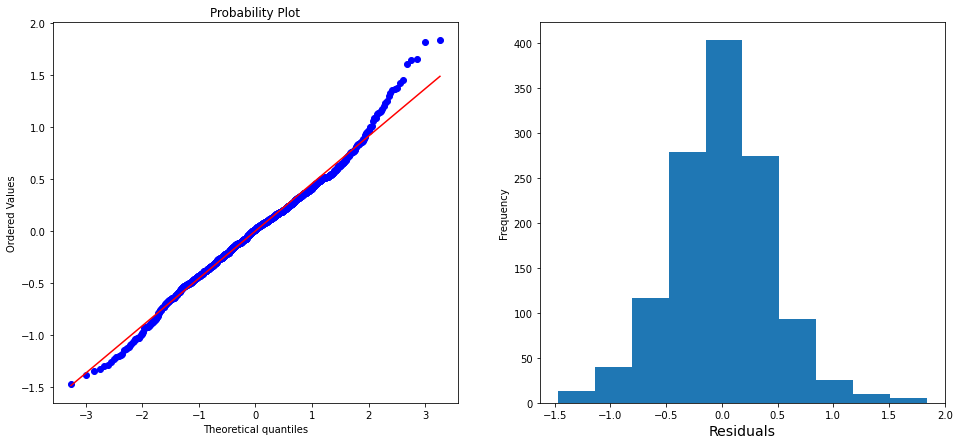

In [ ]:
m5 = smf.ols('np.log(wage) ~ exper + np.power(exper,2) + union + female + service + educ +'\
                            'belowavg + aboveavg', data=data)
fitted = m5.fit(cov_type='HC1')
print(fitted.summary())

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
fitted.resid.plot.hist()
plt.xlabel('Residuals', fontsize=14);

Has the model become worse after 3 features were removed? Let's check it with Fisher's test:

In [ ]:
print("Fisher's test comparing models 5 and 4: F=%f, p=%f, k1=%f" % m4.fit().compare_f_test(m5.fit()))

Fisher's test comparing models 5 and 4: F=1.611478, p=0.184911, k1=3.000000


The difference between models 5 (which is smaller) and 4 (larger) is not significant, which means that removing those 3 features from was justified. 

For the final check, let's see if some of the rows in the dataset have disproportionally large influence on the estimates of the coefficients. We could quantify that with a quantity called leverage. To calculate it for every observation in the sample, we compare the full regression model and the one that is build on the sample with that one observation left out. Leverage of the observation is a measure that difference, hence it determines how much influence the observation have on the estimated regression equation. 

Let's plot it against squared residuals:

<Figure size 576x504 with 0 Axes>

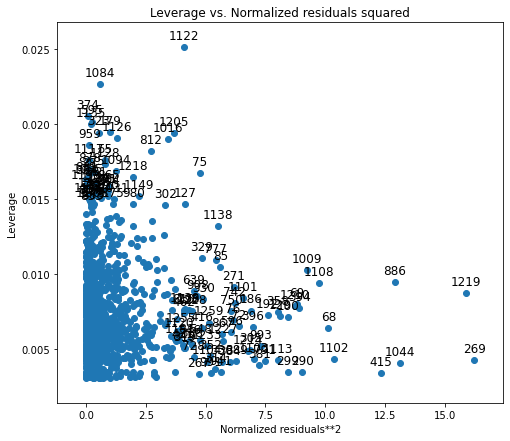

In [ ]:
plt.figure(figsize(8,7))
plot_leverage_resid2(fitted);

There are no points with very different leverage from the rest, which means that there are no obvious problems. Let's examine a couple of datapoints that stand out:

In [ ]:
data.loc[[1122]]

,wage,exper,union,goodhlth,black,female,married,service,educ,belowavg,aboveavg
1122,6.25,47,0,0,1,1,1,0,5,0,1


This datapoint probably has larger leverage because of the very high work experience – one of the highest in the dataset; there isn't anything that is obviously wrong with this observation.

Observation with the highest residual:

In [ ]:
data.loc[[269]]

,wage,exper,union,goodhlth,black,female,married,service,educ,belowavg,aboveavg
269,41.67,16,0,0,0,0,1,0,13,0,1


This person has one of the highest wages in the sample; it makes sense that prediction for him would be less accurate – regression works best in the middle of the target's distribution.

### Conclusions
The final model explains 40% of the log wage variance (as indicated by $R^2$). 

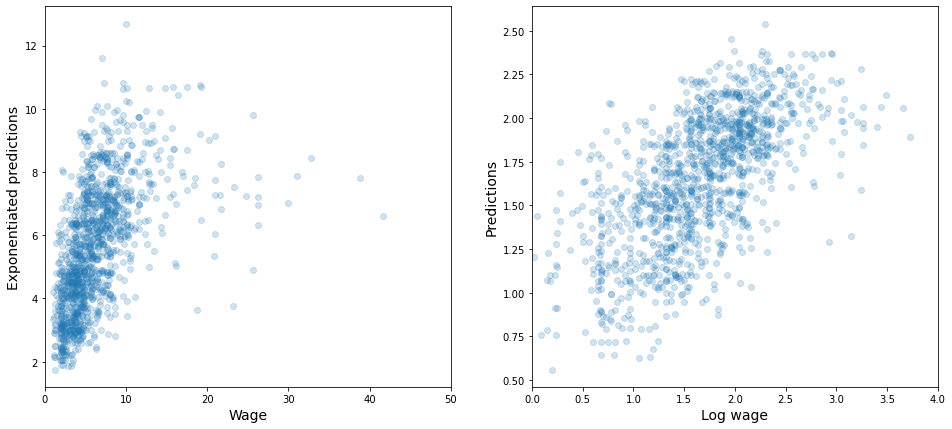

In [ ]:
plt.figure(figsize(16,7))
plt.subplot(121)
scatter(data['wage'],np.exp(fitted.fittedvalues), alpha=0.2)
plt.xlabel('Wage', fontsize=14)
plt.ylabel('Exponentiated predictions', fontsize=14)
plt.xlim([0,50])

plt.subplot(122)
scatter(np.log(data['wage']),fitted.fittedvalues, alpha=0.2)
plt.xlabel('Log wage', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xlim([0,4]);

The features we are interested in – attractiveness below and above average – have coefficients -0.1307 and -0.0010 respectively. 

Because the regression was run for the logarithm of the wage, the coefficients might be interpreted as percentage differences with the base level. Adjusting for work experience, education level, gender, union membership and tye of the industry a person works in (service or not), a person has:

* 13% lower salary if their attractiveness is below average (p=0.001, 95% confidence interval — [5,21]%);
* the same salary if their attractiveness is above average (p=0.972, 95% confidence interval — [-6,6]%).